In [1]:
import numpy, random, math
import matplotlib . pyplot as plt

In [2]:
def generate_data(classA_mean_x_1, classA_mean_y_1, classA_mean_x_2, classA_mean_y_2, classB_mean_x, classB_mean_y):
    
    classA = numpy.concatenate((
        numpy.random.randn(10, 2) * 0.2 + [classA_mean_x_1, classA_mean_y_1],
        numpy.random.randn(10, 2) * 0.2 + [classA_mean_x_2, classA_mean_y_2]
    ))
    
    classB = numpy.random.randn(20, 2) * 0.3 + [classB_mean_x, classB_mean_y]
    
    inputs = numpy.concatenate((classA, classB))
    
    targets = numpy.concatenate((
        numpy.ones(classA.shape[0]), #+1
        -numpy.ones(classB.shape[0]) #-1
    ))
    
    N = inputs.shape[0]  
    
    permute = list(range(N))
    random.shuffle(permute)
    inputs = inputs[permute, :]
    targets = targets[permute]
    # 
    # print("Inputs:\n", inputs)
    # print("Targets:\n", targets)
    
    return inputs, targets

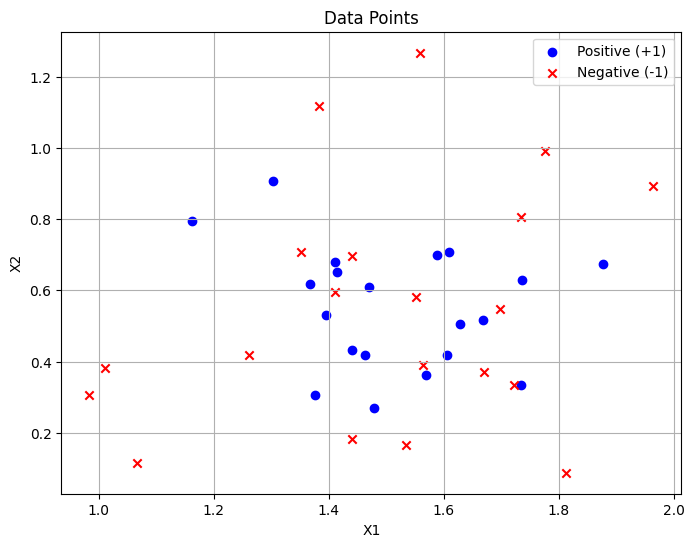

In [3]:

inputs, targets = generate_data(1.5, 0.5, 1.5, 0.5, 1.5, 0.5)
plt.figure(figsize=(8,6))

positive_points = inputs[targets == 1]
negative_points = inputs[targets == -1]

plt.scatter(positive_points[:, 0], positive_points[:, 1], color='blue', marker='o', label='Positive (+1)')
plt.scatter(negative_points[:, 0], negative_points[:, 1], color='red', marker='x', label='Negative (-1)')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data Points')
plt.legend()
plt.grid(True)
plt.show()

## 1. Move the clusters around and change their sizes to make it easier or harder for the classifier to find a decent boundary. Pay attention to when the optimizer (minimize function) is not able to find a solution at all.

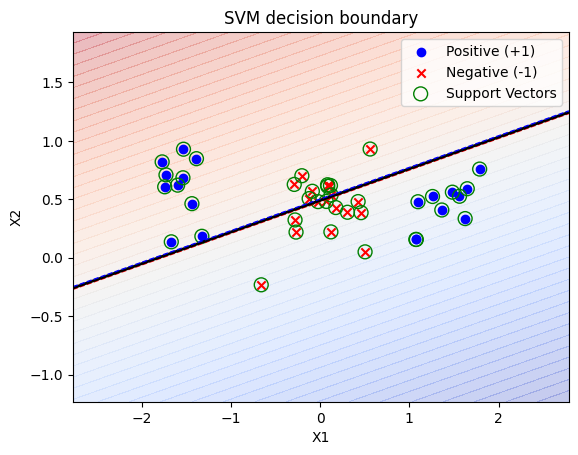

In [4]:
from svm_model import SVM

inputs, targets = generate_data(1.5, 0.5, -1.5, 0.5, 0, 0.5)
svm = SVM(kernel='linear')
svm.fit(inputs, targets)
svm.plot_decision_boundary()

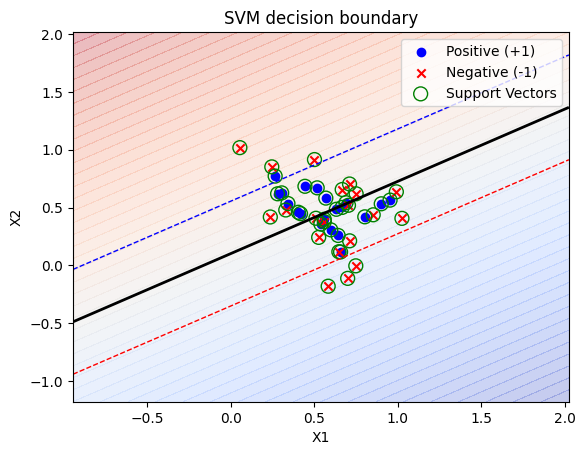

In [5]:
# all cluster together

inputs, targets = generate_data(0.5, 0.5, 0.5, 0.5, 0.5, 0.5)
svm = SVM(kernel='linear')
svm.fit(inputs, targets)
svm.plot_decision_boundary()

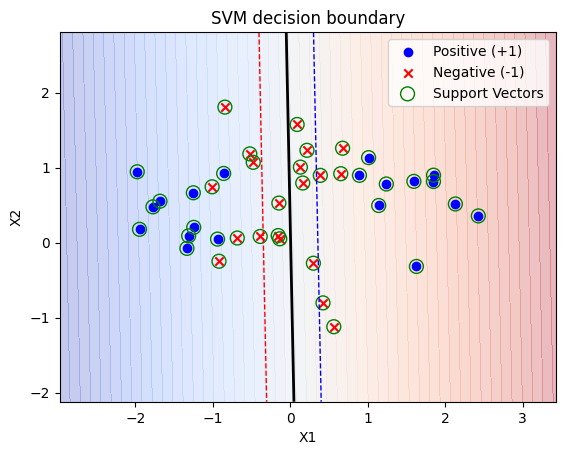

In [6]:
# increase spread of cluster

def generate_data_spread(classA_mean_x_1, classA_mean_y_1, classA_mean_x_2, classA_mean_y_2, classB_mean_x, classB_mean_y):
    
    classA = numpy.concatenate((
    numpy.random.randn(10, 2) * 0.5 + [1.5, 0.5],
    numpy.random.randn(10, 2) * 0.5 + [-1.5, 0.5]
    ))
    
    classB = numpy.random.randn(20, 2) * 0.8 + [0, 0.5]
    
    inputs = numpy.concatenate((classA, classB))
    
    targets = numpy.concatenate((
        numpy.ones(classA.shape[0]), #+1
        -numpy.ones(classB.shape[0]) #-1
    ))
    
    N = inputs.shape[0]  
    
    permute = list(range(N))
    random.shuffle(permute)
    inputs = inputs[permute, :]
    targets = targets[permute]
    
    return inputs, targets

inputs, targets = generate_data_spread(1.5, 0.5, -1.5, 0.5, 0, 0.5)
svm = SVM(kernel='linear')
svm.fit(inputs, targets)
svm.plot_decision_boundary()

## 2. Implement the two non-linear kernels. You should be able to classify very hard data sets with these.

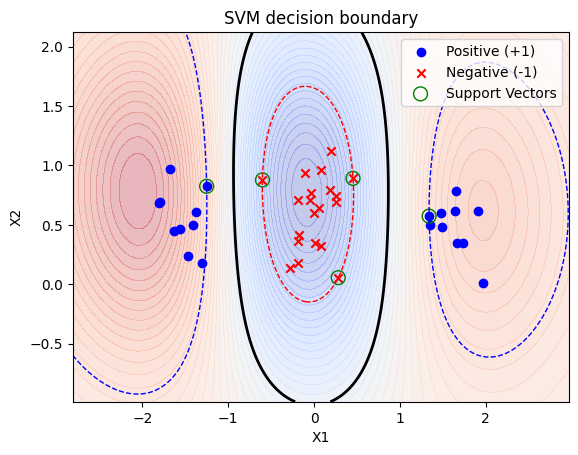

In [7]:
from svm_model import SVM

inputs, targets = generate_data(1.5, 0.5, -1.5, 0.5, 0, 0.5)
svm = SVM(kernel='rbf')
svm.fit(inputs, targets)
svm.plot_decision_boundary()

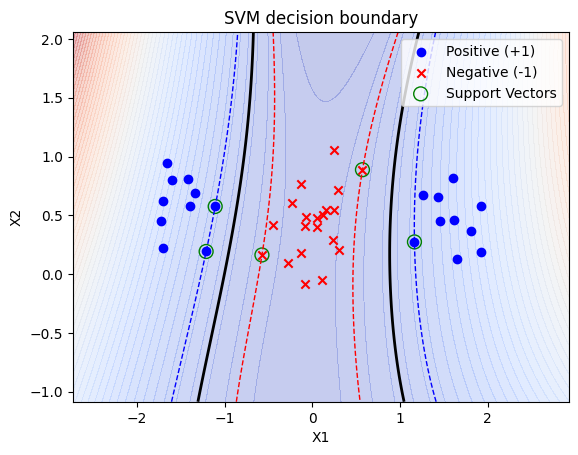

In [8]:
from svm_model import SVM

inputs, targets = generate_data(1.5, 0.5, -1.5, 0.5, 0, 0.5)
svm = SVM(kernel='poly')
svm.fit(inputs, targets)
svm.plot_decision_boundary()

## 3. The non-linear kernels have parameters; explore how they influence the decision boundary. Reason about this in terms of the biasvariance trade-of

In [9]:

def generate_data_cubic(a=1, b=0, c=0, d=0, n_points=50, noise=0):

    inputs = numpy.random.uniform(-3, 3, (n_points, 2))
    
    f_x = a * inputs[:, 0]**3 + b * inputs[:, 0]**2 + c * inputs[:, 0] + d
    
    targets = numpy.where(inputs[:, 1] > f_x, 1, -1)
    
    inputs += numpy.random.randn(*inputs.shape) * noise
    
    permute = list(range(n_points))
    random.shuffle(permute)
    inputs = inputs[permute, :]
    targets = targets[permute]
    
    return inputs, targets

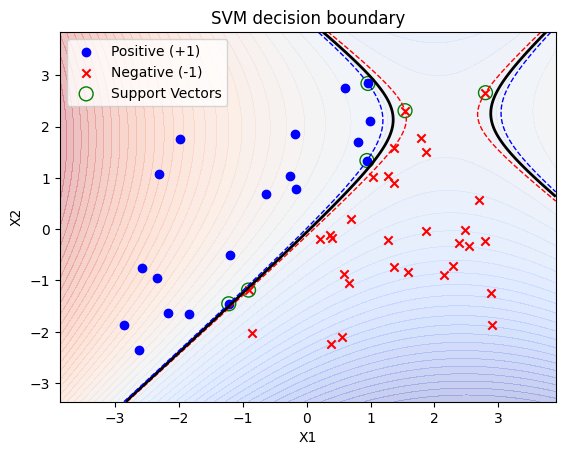

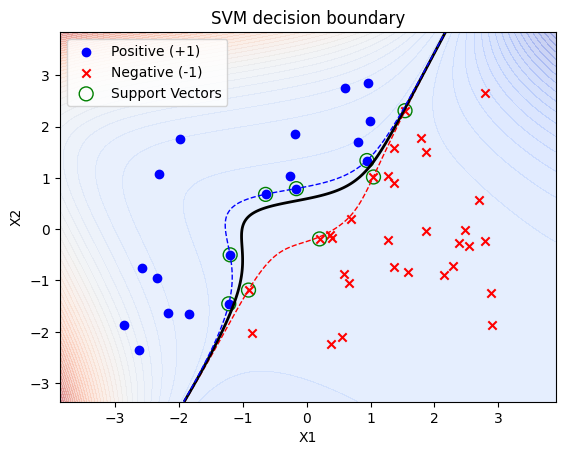

In [10]:

inputs, targets = generate_data_cubic(a=4, b=2, c=1, d=0, n_points=50)

inputs, targets = generate_data_cubic()
svm = SVM(kernel='poly', poly_exp=2)
svm.fit(inputs, targets)
svm.plot_decision_boundary()

svm = SVM(kernel='poly', poly_exp=6)
svm.fit(inputs, targets)
svm.plot_decision_boundary()

 Increasing the degree of the polynomial makes the decision boundary more flexible and complex. This can reduce bias because the model can fit the training data more closely. However, it also increases variance, as the model might start fitting noise in the training data, leading to overfitting.

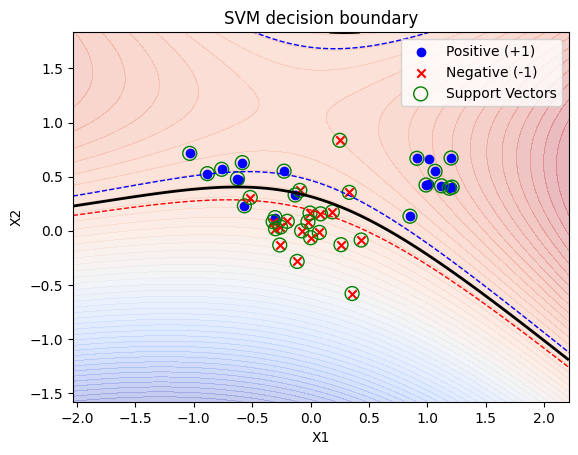

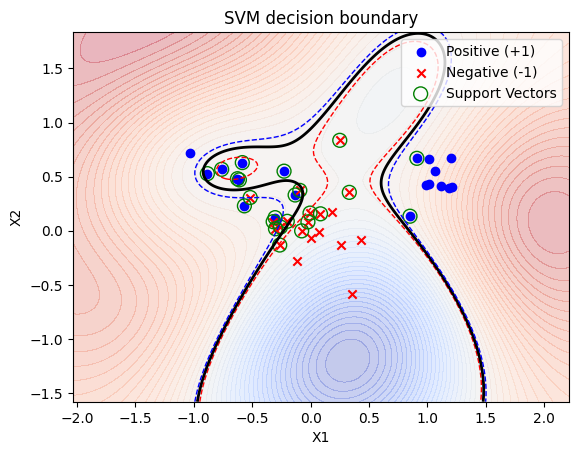

In [11]:
from svm_model import SVM

inputs, targets = generate_data(1, 0.5, -0.5, 0.5, 0, 0)
svm = SVM(kernel='rbf', rbf_sigma=4)
svm.fit(inputs, targets)
svm.plot_decision_boundary()

svm = SVM(kernel='rbf', rbf_sigma=1)
svm.fit(inputs, targets)
svm.plot_decision_boundary()

A smaller sigma means the kernel function decays very quickly. Each training point only influences a very small neighborhood, allowing the decision boundary to become highly flexible and adapt closely to the training data. This results in low bias but high variance, as the model may overfit.

## 4. Explore the role of the slack parameter C. What happens for very large/small values?


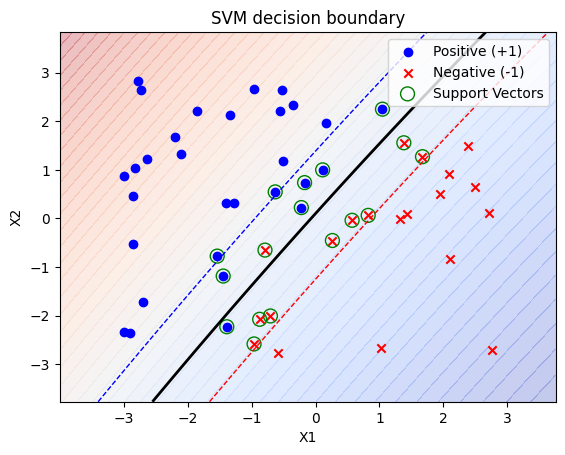

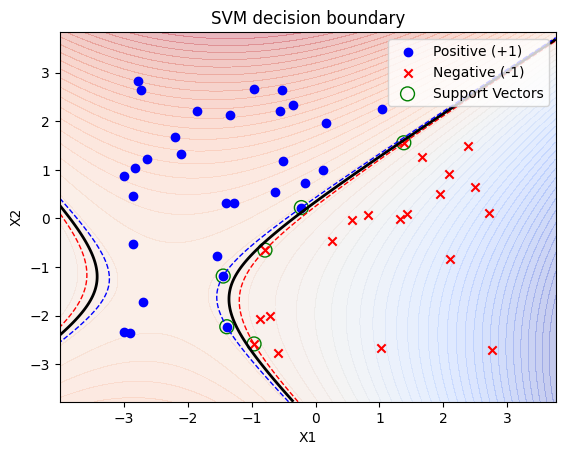

In [12]:
from svm_model import SVM
inputs, targets = generate_data_cubic(a=2, b=2, c=1, d=0, n_points=100, noise=0.5)

inputs, targets = generate_data_cubic()
svm = SVM(kernel='poly',C=0.1, poly_exp=2)
svm.fit(inputs, targets)
svm.plot_decision_boundary()

svm = SVM(kernel='poly', C=1e5, poly_exp=2)
svm.fit(inputs, targets)
svm.plot_decision_boundary()


[-0.60176167 -1.27271288]
-1.0


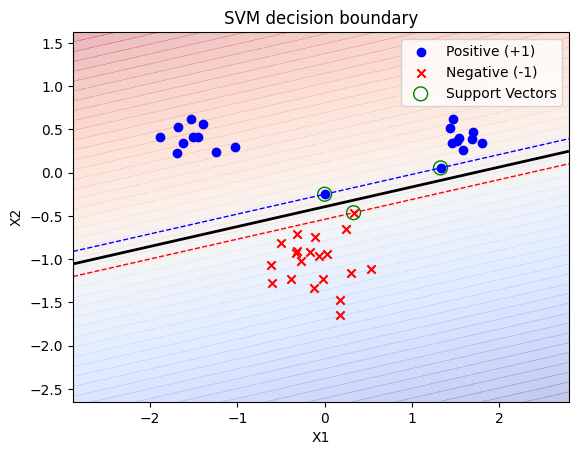

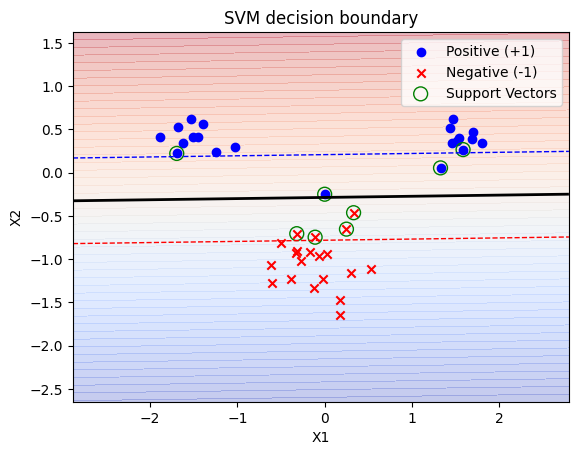

In [13]:
from svm_model import SVM

inputs, targets = generate_data(1.5, 0.5, -1.5, 0.5, 0, -1)
print(inputs[1])
print(targets[1])
new_sample = numpy.array([[0.0, -0.25]])  
new_target = numpy.array([1])           

inputs = numpy.concatenate((inputs, new_sample), axis=0)
targets = numpy.concatenate((targets, new_target), axis=0)

svm = SVM(kernel='linear')
svm.fit(inputs, targets)
svm.plot_decision_boundary()

svm = SVM(kernel='linear', C=1)
svm.fit(inputs, targets)
svm.plot_decision_boundary()

[ 0.02426686 -0.83958321]
-1.0


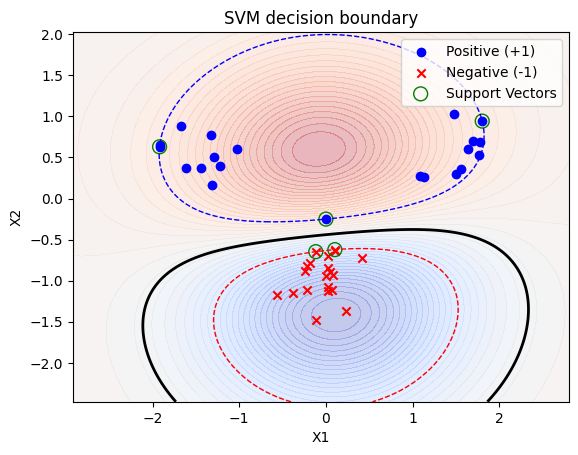

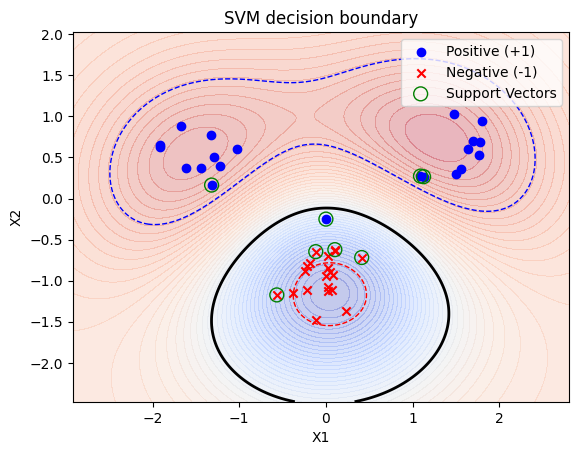

In [14]:
from svm_model import SVM
import numpy

inputs, targets = generate_data(1.5, 0.5, -1.5, 0.5, 0, -1)
print(inputs[1])
print(targets[1])

new_sample = numpy.array([[0.0, -0.25]])  
new_target = numpy.array([1])           

inputs = numpy.concatenate((inputs, new_sample), axis=0)
targets = numpy.concatenate((targets, new_target), axis=0)

svm = SVM(kernel='rbf')  
svm.fit(inputs, targets)
svm.plot_decision_boundary()

svm = SVM(kernel='rbf', C=1)  
svm.fit(inputs, targets)
svm.plot_decision_boundary()
